# Problema do Caixeiro Viajante Ultilizando Algoritimos Geneticos

## ***Inicialização da população***


In [1]:
import random
import math

In [2]:
class Cidade():
  def __init__(self,x,y):
    self.x = x
    self.y = y

  def __repr__(self):
        return "(" + str(self.x) + "," + str(self.y) + ")"

  #def __str__(self):
    #return ('[{},{}]'.format(self.x,self.y))

  def calcularDistancia(self,outraCidade):
    dist = math.sqrt(pow(abs(outraCidade.x - self.x),2) + pow(abs(outraCidade.y - self.y),2)) # formula da distancia entre 2 pontos
    return dist

In [3]:
# Geração inicial da lista de caminho aleatorios com base nas possiveis cidades e tamanho desejado de caminhos
def gerarPopulacaoInicial(listaCidades,popSize):
  caminhos = []
  for x in range(popSize):
    caminhos.append(random.sample(listaCidades,len(listaCidades)))
  return caminhos

In [4]:
# teste   
c1 = Cidade(0,0)
c2 = Cidade(1,1)
c3 = Cidade(4,4)
c4 = Cidade(6,6)
pop = [c1,c2,c3,c4]
pool = [[c1,c2,c3,c4],[c2,c3,c4,c1],[c3,c4,c1,c2],[c4,c3,c2,c1],[c4,c2,c3,c1]]
rotas1 = gerarPopulacaoInicial(pop,3) #Lista dos caminhos iniciais
rotas1

[[(1,1), (4,4), (6,6), (0,0)],
 [(1,1), (0,0), (4,4), (6,6)],
 [(6,6), (1,1), (4,4), (0,0)]]

## Fitness

In [5]:
def calcularFitness(rota): # ranking da Lista de cidades(rotas). rota = Lista de cidades
  distanciaPercorrida = 0
  for x in range(len(rota)):
    if x+1 < len(rota): # Até o ultimo elemento da lista
      distanciaPercorrida += rota[x].calcularDistancia(rota[x+1]) # Somatorio da distancia entre 2 cidades até a ultima cidade
  return 1/distanciaPercorrida # lembrar de procurar formas de classificação

def fitnessRotas(rotas):
  lista = []
  for rota in rotas:
    lista.append(calcularFitness(rota))
  return lista

In [6]:
# teste
fitnessRotas(pool)

[0.11785113019775793,
 0.0642824346533225,
 0.07856742013183861,
 0.1178511301977579,
 0.05892556509887897]

## Seleção (Roleta)

In [7]:
def probabilidade(lista_fitness):
  probabilidade = []
  for fitness in lista_fitness: # Calculando a probabilidade com base na formula da roleta(slide)
    probabilidade.append(fitness/sum(lista_fitness))
  return probabilidade # lista das probabilidades para cada fitness

def roleta(rotas):
  lista_fitness = []
  for rota in rotas: # calculando o fitness para cada rota
    lista_fitness.append(calcularFitness(rota))
  return(lista_fitness,probabilidade(lista_fitness)) # retorna uma lista com todos os fitness e outra com suas probabilidades

def selecionarRotas(rotas,tamanhoElite):
  rotas_selecionadas = []
  fit,prob = roleta(rotas) # 2 listas com o fit das rotas e suas respectivas probabilidades
  for i in range(0,tamanhoElite):
    aux = (random.choices(rotas,prob)) # fazer a seleção aleatoria com base nas probabilidades
    while aux[0] in rotas_selecionadas: # loop para evitar repetição nas rotas_selecionadas
      aux = random.choices(rotas,prob)
    rotas_selecionadas += aux
  outras_rotas = [rota for rota in rotas if rota not in rotas_selecionadas] # As rotas que não foram selecionadas na roleta
  return rotas_selecionadas,outras_rotas

### teste

In [8]:
paisSelecionados = roleta(gerarPopulacaoInicial(pop,3))

In [9]:
fits,prob = paisSelecionados

In [10]:
fits,prob

([0.07071067811865477, 0.10101525445522107, 0.07071067811865475],
 [0.29166666666666674, 0.41666666666666663, 0.29166666666666663])

In [11]:
random.choices(fits,prob)

[0.07071067811865475]

In [12]:
selecionarRotas(pool,2)

([[(0,0), (1,1), (4,4), (6,6)], [(6,6), (4,4), (1,1), (0,0)]],
 [[(1,1), (4,4), (6,6), (0,0)],
  [(4,4), (6,6), (0,0), (1,1)],
  [(6,6), (1,1), (4,4), (0,0)]])

## Cruzamento


In [13]:
def cruzamento(rotaPai1,rotaPai2):
  cidades = []
  cidadesFilhas1 = []
  cidadesFilhas2 = []
  geneCidadeA = int(random.random()*len(rotaPai1)) # divisão randomica dos genes de cada pai
  geneCidadeB = int(random.random()*len(rotaPai1)) # entre 0 e tamanho da rota

  geneInicio = min(geneCidadeA,geneCidadeB)
  geneFim = max(geneCidadeA,geneCidadeB)

  for i in range(geneInicio,geneFim):
    cidadesFilhas1.append(rotaPai1[i])

  cidadesFilhas2 = [cidade for cidade in rotaPai2 if cidade not in cidadesFilhas1]
  cidades = cidadesFilhas1 + cidadesFilhas2
  return cidades

def cruzarPop(rotas): # Cruzamento das rotas selecionadas(a primeira cidade muda nesse caso)
  rotas_filhas = []   
  for i in range(len(rotas)):
    rotas_filhas.append(cruzamento(rotas[i],rotas[len(rotas)-i-1]))
  return rotas_filhas # vai retornar a mesma quantidade de rotas passadas na entrada depois do cruzamento de todas as rotas

### teste

In [14]:
# teste
cruzamento(pool[0],pool[1])

[(1,1), (4,4), (6,6), (0,0)]

In [15]:
len(pool)

5

In [16]:
cruzarPop(pool)

[[(1,1), (6,6), (4,4), (0,0)],
 [(4,4), (6,6), (1,1), (0,0)],
 [(6,6), (0,0), (4,4), (1,1)],
 [(4,4), (1,1), (6,6), (0,0)],
 [(1,1), (4,4), (0,0), (6,6)]]

## Mutação

Mutação vai trocar a posição de 2 cidades(sem ser a cidade inicial) de forma aleatoria

In [17]:
def mutation(rotas,mutationRate): # caso a taxa de mutação seja maior as cidades são trocadas (cidade inicial não é trocada)
  rotasMutadas = []
  for rota in rotas:
    if random.random() < mutationRate:
      indexCidade1,indexCidade2 = random.sample([x for x in range(1,len(rota))],2) # selecionar 2 cidades para troca(excluindo a cidade inicial)
      aux = rota[indexCidade1]
      rota[indexCidade1] = rota[indexCidade2]
      rota[indexCidade2] = aux
  return rotas

### teste

In [18]:
indexC1,index2 = random.sample([x for x in range(1,len(pool[0]))],2)
print(indexC1,index2)

2 3


In [19]:
mutation(pool,0.9)

[[(0,0), (1,1), (6,6), (4,4)],
 [(1,1), (0,0), (6,6), (4,4)],
 [(4,4), (0,0), (6,6), (1,1)],
 [(6,6), (0,0), (1,1), (4,4)],
 [(6,6), (0,0), (4,4), (1,1)]]

## Main

In [20]:
def morteMenosApto(rotas,lenFilhos): # Organizando as rotas por fitness e mantendo o tamanho da populacao, descartando os piores
  rotas.sort(reverse=True,key=calcularFitness)
  split = len(rotas)-lenFilhos
  return (rotas[:split])


In [60]:
from matplotlib import pyplot as plt # Funcao para plotar os graficos
def plotar(rota):
  popTesteX = [cidade.x for cidade in rota] # pegando todos os pontos do eixo X
  popTesteY = [cidade.y for cidade in rota] # pegando todos os pontos do eixo Y
  plt.plot(popTesteX,popTesteY,marker='o',color='mediumvioletred')

In [62]:
def caixeiroViajante(rotas,tamanhoPop,tamanhoElite,taxaMutacao,numeroGeracoes):
  geracao = gerarPopulacaoInicial(rotas,tamanhoPop) # geracao como parametro (cidades para permutação)
  print("geracao Inicial")
  print(geracao[0])
  plotar(geracao[0]) # grafico
  for x in range(0,numeroGeracoes):
    rotasSelecionadas,outrasRotas =  selecionarRotas(geracao,tamanhoElite) # elite(roleta)
    filhos = cruzarPop(rotasSelecionadas) # todas as rotas selecionadas vão gerar filhos
    filhos = mutation(filhos,taxaMutacao) # Chance de mutacao nos filhos
    novaGeracao = geracao+filhos
    geracao = morteMenosApto(novaGeracao,len(filhos)) # mantendo o tamanho da população
  print('Tamanho:{}'.format(len(geracao)))
  return geracao

In [23]:
teste = gerarPopulacaoInicial(pop,200)

In [24]:
select = selecionarRotas(teste,20) # as outras rotas vem com tamanho menor pq não repetem

In [25]:
len(select[1])

24

In [26]:
selecionarRotas(pool,2)

([[(0,0), (1,1), (6,6), (4,4)], [(4,4), (0,0), (6,6), (1,1)]],
 [[(1,1), (0,0), (6,6), (4,4)],
  [(6,6), (0,0), (1,1), (4,4)],
  [(6,6), (0,0), (4,4), (1,1)]])

geracao Inicial
[(15,14), (10,22), (5,17), (21,14), (0,0), (9,13), (4,9), (13,4), (7,11)]
Tamanho:200


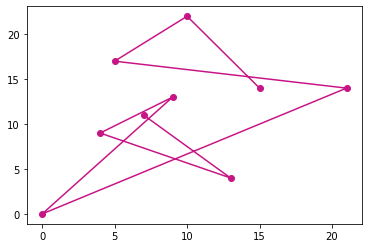

In [63]:
from matplotlib import pyplot as plt
cid1 = Cidade(0,0)
cid2 = Cidade(9,13)
cid3 = Cidade(5,17)
cid4 = Cidade(13,4)
cid5 = Cidade(21,14)
cid6 = Cidade(15,14)
cid7 = Cidade(10,22)
cid8 = Cidade(7,11)
cid9 = Cidade(4,9)
popTeste = [cid1,cid2,cid3,cid4,cid5,cid6,cid7,cid8,cid9]

#popTesteX = [cidade.x for cidade in popTeste]
#popTesteY = [cidade.y for cidade in popTeste]
#plt.plot(popTesteX,popTesteY,marker='o',color='mediumvioletred')
g = caixeiroViajante(popTeste,200,20,0.1,2)


resultado


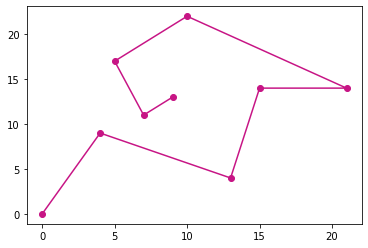

In [64]:
print("resultado")
plotar(g[0])